# Exercise sheet 7 - exam preparation

In [1]:
library(rethinking)
data(milk)

Lade nötiges Paket: rstan

Lade nötiges Paket: StanHeaders


rstan version 2.26.16 (Stan version 2.26.1)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


Do not specify '-march=native' in 'LOCAL_CPPFLAGS' or a Makevars file

Lade nötiges Paket: cmdstanr

This is cmdstanr version 0.5.3

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: D:/Users/Immanuel/Documents/.cmdstan/cmdstan-2.31.0

- CmdStan version: 2.31.0


A newer version of CmdStan is available. See ?install_cmdstan() to install it.
To disable this check set option or environment variable CMDSTANR_NO_VER_CHECK=TRUE.

Lade nötiges Paket: parallel

rethinking (Version 2.31)

In [3]:
milk

clade,species,kcal.per.g,perc.fat,perc.protein,perc.lactose,mass,neocortex.perc
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Strepsirrhine,Eulemur fulvus,0.49,16.60,15.42,67.98,1.95,55.16
Strepsirrhine,E macaco,0.51,19.27,16.91,63.82,2.09,NA
Strepsirrhine,E mongoz,0.46,14.11,16.85,69.04,2.51,NA
Strepsirrhine,E rubriventer,0.48,14.91,13.18,71.91,1.62,NA
Strepsirrhine,Lemur catta,0.60,27.28,19.50,53.22,2.19,NA
New World Monkey,Alouatta seniculus,0.47,21.22,23.58,55.20,5.25,64.54
New World Monkey,A palliata,0.56,29.66,23.46,46.88,5.37,64.54
New World Monkey,Cebus apella,0.89,53.41,15.80,30.79,2.51,67.64
New World Monkey,Saimiri boliviensis,0.91,46.08,23.34,30.58,0.71,NA


In [6]:
d <- data.frame(list(
	clade = as.integer(milk$clade),
	energy = milk$kcal.per.g
))
d

clade,energy
<int>,<dbl>
4,0.49
4,0.51
4,0.46
4,0.48
4,0.60
2,0.47
2,0.56
2,0.89
2,0.91


Here we numbered the clades as 1. Ape, 2. New World Monkey, 3. Old World Monkey and 4. Strepsirrhine.

In [36]:
model1 <- map2stan(
	alist(
		energy ~ dnorm(mu, sigma),
		mu <- a[clade],
		a[clade] ~ dnorm(0.5, 1),
		sigma ~ dcauchy(0, 10)
	),
	data = d,
	constraints = list(sigma = "lower=0"),
	cores = 8, chains = 8
)

Warning message in map2stan(alist(energy ~ dnorm(mu, sigma), mu <- a[clade], a[clade] ~ :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpUBw4wf/model-15502feccee.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpUBw4wf/model-15502feccee.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc




Running MCMC with 8 parallel chains...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 1 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 1 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 1 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 1 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 1 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 1 Itera

Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpUBw4wf/model-15502feccee.stan', line 19, column 4 to column 34)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 7 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 7 



Chain 8 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 8 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 8 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 8 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 8 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 8 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 8 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 8 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 8 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 8 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 8 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 8 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 8 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 8 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 8 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 8 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 8 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 8 Iteration: 1600 / 2000 [ 80%]  (Sampling) 


Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpUBw4wf/model-15502feccee.stan', line 19, column 4 to column 34)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 8 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 8 



Chain 1 finished in 0.1 seconds.
Chain 2 finished in 0.1 seconds.
Chain 3 finished in 0.1 seconds.
Chain 4 finished in 0.1 seconds.
Chain 5 finished in 0.1 seconds.
Chain 6 finished in 0.1 seconds.
Chain 7 Iteration: 1900 / 2000 [ 95%]  (Sampling) 
Chain 7 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 7 finished in 0.1 seconds.
Chain 8 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 8 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Chain 8 Iteration: 1900 / 2000 [ 95%]  (Sampling) 
Chain 8 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 8 finished in 0.1 seconds.

All 8 chains finished successfully.
Mean chain execution time: 0.1 seconds.
Total execution time: 0.5 seconds.



Computing WAIC



![image.png](pch.png)

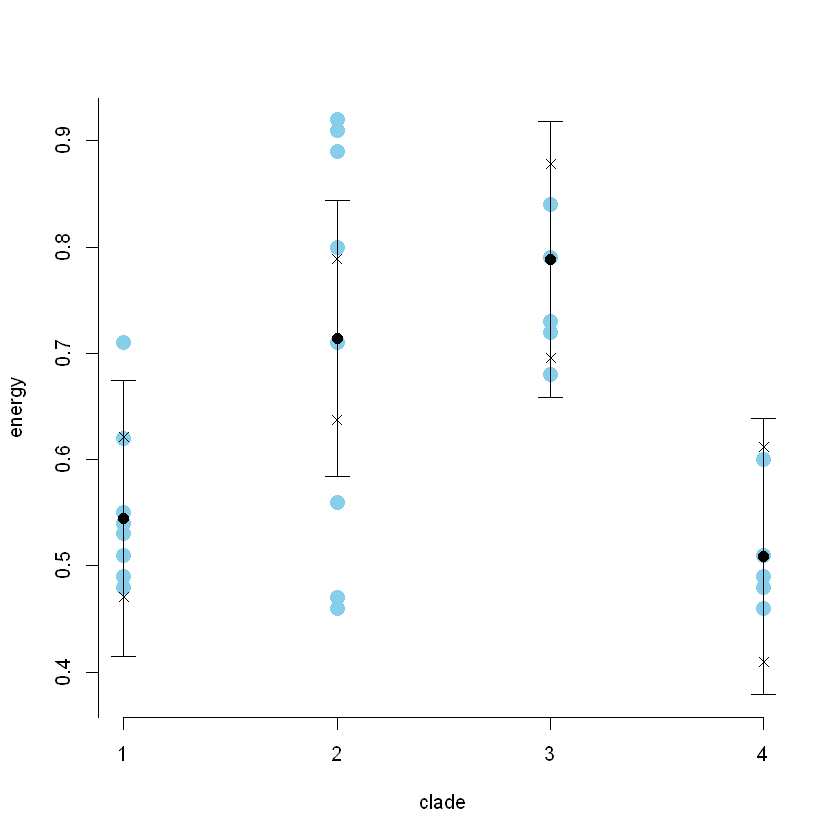

In [108]:
post <- extract.samples(model1)
mu <- post$a
mu_mean <- apply(mu, 2, mean)
mu_HPDI <- apply(mu, 2, HPDI, prob = 0.92)
sigma <- mean(post$sigma)
clade <- 1:4
plot(energy ~ clade, data = d, ylim = c(min(mu_mean - sigma), max(mu_mean + sigma)), col = "skyblue", pch = 19, cex = 1.7, axes = FALSE)
axis(1, 1:4)
axis(2, seq(0, 1, 0.1))
points(c(1:4, 1:4), c(t(mu_HPDI)), pch = 4)
arrows(1:4, mu_mean - sigma, 1:4, mu_mean + sigma, angle = 90, code = 3, length = 0.1, cex = 2)
points(mu_mean, pch = 19, cex = 1.2)